<a href="https://colab.research.google.com/github/jothimanim2005/jothimani_AIML/blob/main/aiml_k_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

# Create a larger dataset with 50 rows
np.random.seed(42)

data = {
    'Name': [f'Person_{i}' for i in range(1, 51)],
        'Age': np.random.randint(20, 60, size=50),
            'Income': np.random.randint(30000, 120000, size=50),
                'City': np.random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'], size=50),
                    'Education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], size=50)
                    }

df = pd.DataFrame(data)

# Save the DataFrame as income.csv
df.to_csv('income.csv', index=False)

# Load and print the first 10 rows for verification
df_loaded = pd.read_csv('income.csv')
print(df_loaded.head(10))

        Name  Age  Income         City    Education
0   Person_1   58   97121      Phoenix          PhD
1   Person_2   48   99479  Los Angeles     Bachelor
2   Person_3   34  119475  Los Angeles     Bachelor
3   Person_4   27   49457     New York       Master
4   Person_5   40   96557      Houston          PhD
5   Person_6   58  107189     New York     Bachelor
6   Person_7   38  108953      Houston       Master
7   Person_8   42   82995  Los Angeles          PhD
8   Person_9   30   70757     New York  High School
9  Person_10   30   39692      Phoenix       Master


In [3]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income,City,Education
0,Person_1,58,97121,Phoenix,PhD
1,Person_2,48,99479,Los Angeles,Bachelor
2,Person_3,34,119475,Los Angeles,Bachelor
3,Person_4,27,49457,New York,Master
4,Person_5,40,96557,Houston,PhD


Text(0, 0.5, 'Income($)')

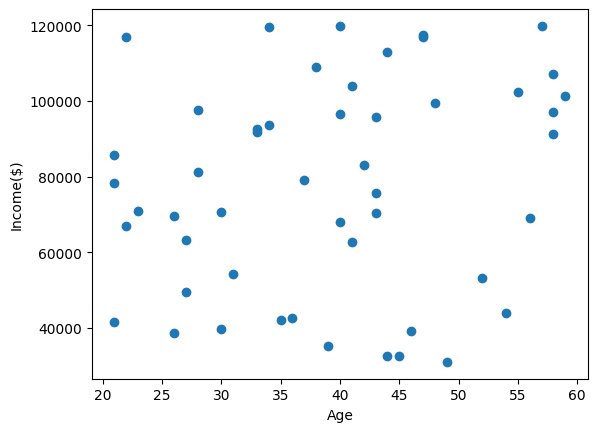

In [ ]:
plt.scatter(df.Age,df['Income'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [ ]:
km = KMeans(n_clusters=3, random_state=42, n_init=10)
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 0, 2, 0, 1, 2, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 2, 0, 2, 2, 1, 2, 2, 0, 1, 1, 0, 2, 0,
       1, 2, 2, 0, 1, 0], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income,City,Education,cluster
0,Person_1,58,97121,Phoenix,PhD,1
1,Person_2,48,99479,Los Angeles,Bachelor,1
2,Person_3,34,119475,Los Angeles,Bachelor,1
3,Person_4,27,49457,New York,Master,0
4,Person_5,40,96557,Houston,PhD,1


In [ ]:
km.cluster_centers_

array([[3.82142857e+01, 4.11745000e+04],
       [4.36666667e+01, 1.04886857e+05],
       [3.33333333e+01, 7.29424667e+04]])

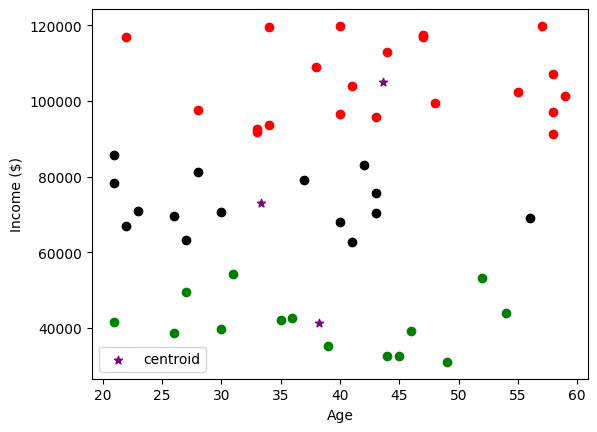

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

In [ ]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [ ]:
df.head()

,Name,Age,Income,City,Education,cluster
0,Person_1,0.973684,0.744459,Phoenix,PhD,1
1,Person_2,0.710526,0.771014,Los Angeles,Bachelor,1
2,Person_3,0.342105,0.996205,Los Angeles,Bachelor,1
3,Person_4,0.157895,0.207678,New York,Master,0
4,Person_5,0.500000,0.738108,Houston,PhD,1


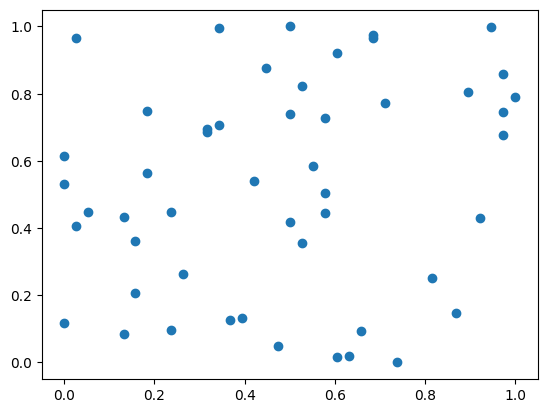

In [ ]:
plt.scatter(df.Age,df['Income'])

In [ ]:
km = KMeans(n_clusters=3, random_state=42, n_init=10)
y_predicted = km.fit_predict(df[['Age','Income']])

In [ ]:
y_predicted

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 0, 2, 0, 2, 2, 1, 0, 1,
       2, 0, 1, 1, 2, 1, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 2,
       1, 0, 0, 2, 0, 2], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income,City,Education,cluster
0,Person_1,0.973684,0.744459,Phoenix,PhD,1
1,Person_2,0.710526,0.771014,Los Angeles,Bachelor,1
2,Person_3,0.342105,0.996205,Los Angeles,Bachelor,1
3,Person_4,0.157895,0.207678,New York,Master,0
4,Person_5,0.500000,0.738108,Houston,PhD,1


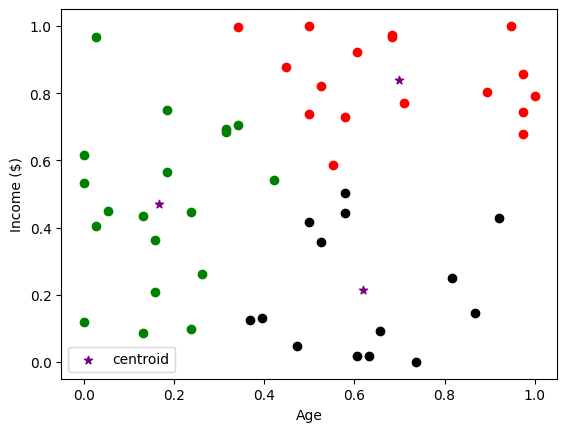

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

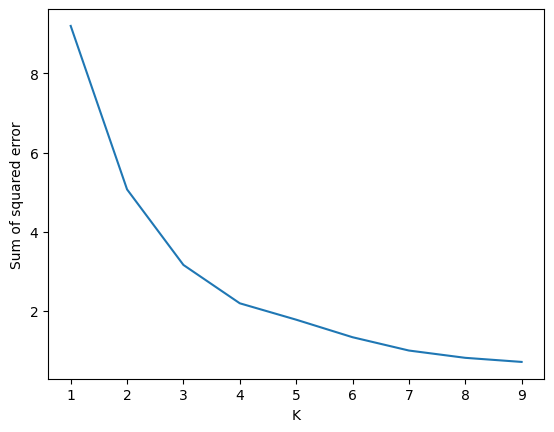

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)